In [8]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbols = ['BTC-USD', 'ETH-USD']
data = {}
for symbol in symbols:    
    df = yf.download(symbol, start="2020-01-01", end="2024-12-31", auto_adjust=False)
    df.reset_index(inplace=True) 
    
    # 2 Sigma method    
    mean = df['Close'].mean()
    std = df['Close'].std()
    upper = mean + 2 * std
    lower = mean - 2 * std
    df['Outlier_STD'] = (df['Close'] > upper) | (df['Close'] < lower)

    # IQR method
    Q1 = df['Close'].quantile(0.25)
    Q3 = df['Close'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df['Outlier_IQR'] = (df['Close'] < lower_bound) | (df['Close'] > upper_bound)
    
    data[symbol] = df
    


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
btc_outliers_std = data['BTC-USD'][data['BTC-USD']['Outlier_STD']]
btc_outliers_iqr = data['BTC-USD'][data['BTC-USD']['Outlier_IQR']]

print("Выбросы BTC по методу 2σ:")
print(btc_outliers_std[['Date', 'Close']])

print("\nВыбросы BTC по методу IQR:")
print(btc_outliers_iqr[['Date', 'Close']])


Выбросы BTC по методу 2σ:
Price        Date          Close
Ticker                   BTC-USD
1775   2024-11-10   80474.187500
1776   2024-11-11   88701.484375
1777   2024-11-12   87955.812500
1778   2024-11-13   90584.164062
1779   2024-11-14   87250.429688
1780   2024-11-15   91066.007812
1781   2024-11-16   90558.476562
1782   2024-11-17   89845.851562
1783   2024-11-18   90542.640625
1784   2024-11-19   92343.789062
1785   2024-11-20   94339.492188
1786   2024-11-21   98504.726562
1787   2024-11-22   98997.664062
1788   2024-11-23   97777.281250
1789   2024-11-24   98013.820312
1790   2024-11-25   93102.296875
1791   2024-11-26   91985.320312
1792   2024-11-27   95962.531250
1793   2024-11-28   95652.468750
1794   2024-11-29   97461.523438
1795   2024-11-30   96449.054688
1796   2024-12-01   97279.789062
1797   2024-12-02   95865.304688
1798   2024-12-03   96002.164062
1799   2024-12-04   98768.531250
1800   2024-12-05   96593.570312
1801   2024-12-06   99920.710938
1802   2024-12-07

In [41]:
eth_outliers_std = data['ETH-USD'][data['ETH-USD']['Outlier_STD']]
eth_outliers_iqr = data['ETH-USD'][data['ETH-USD']['Outlier_IQR']]

print("Выбросы ETH по методу 2σ:")
print(eth_outliers_std[['Date', 'Close']])

print("\nВыбросы ETH по методу IQR:")
print(eth_outliers_iqr[['Date', 'Close']])


Выбросы ETH по методу 2σ:
Price        Date        Close
Ticker                 ETH-USD
666    2021-10-28  4287.318848
667    2021-10-29  4414.746582
668    2021-10-30  4325.650391
669    2021-10-31  4288.074219
670    2021-11-01  4324.626953
671    2021-11-02  4584.798828
672    2021-11-03  4607.193848
673    2021-11-04  4537.324219
674    2021-11-05  4486.243164
675    2021-11-06  4521.581055
676    2021-11-07  4620.554688
677    2021-11-08  4812.087402
678    2021-11-09  4735.068848
679    2021-11-10  4636.174316
680    2021-11-11  4730.384277
681    2021-11-12  4667.115234
682    2021-11-13  4651.460449
683    2021-11-14  4626.358887
684    2021-11-15  4557.503906
686    2021-11-17  4287.593750
688    2021-11-19  4298.306641
689    2021-11-20  4409.931152
692    2021-11-23  4340.763672
697    2021-11-28  4294.453613
698    2021-11-29  4445.104980
699    2021-11-30  4631.479004
700    2021-12-01  4586.990234
701    2021-12-02  4511.302246
705    2021-12-06  4358.737305
706    2021-1

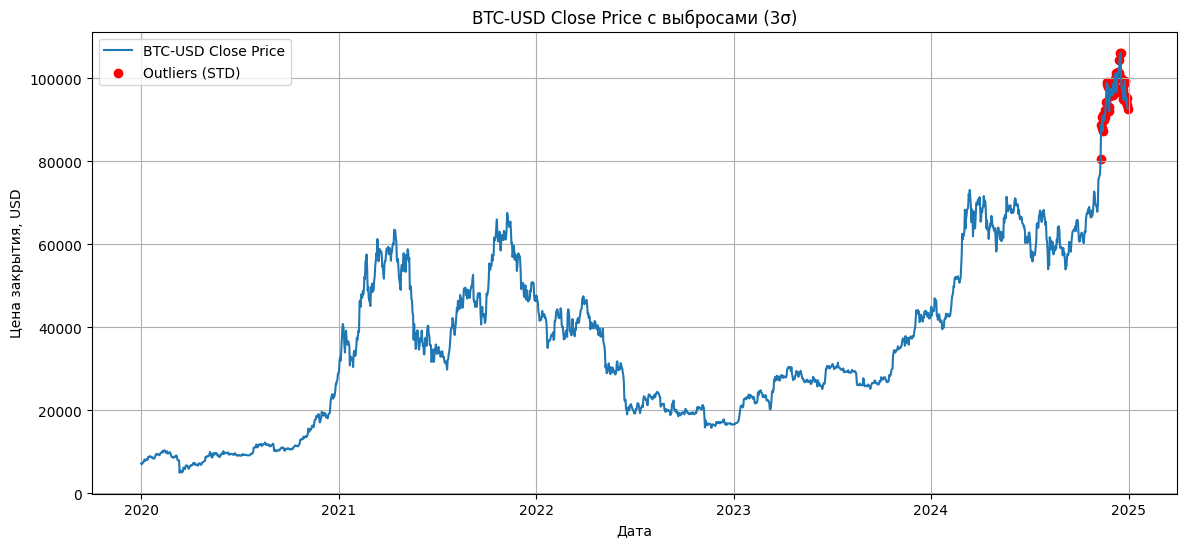

In [11]:
df = data['BTC-USD']

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='BTC-USD Close Price')
plt.scatter(df[df['Outlier_STD']]['Date'], df[df['Outlier_STD']]['Close'], color='red', label='Outliers (STD)', marker='o')
plt.title('BTC-USD Close Price с выбросами (3σ)')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия, USD')
plt.legend()
plt.grid(True)
plt.show()


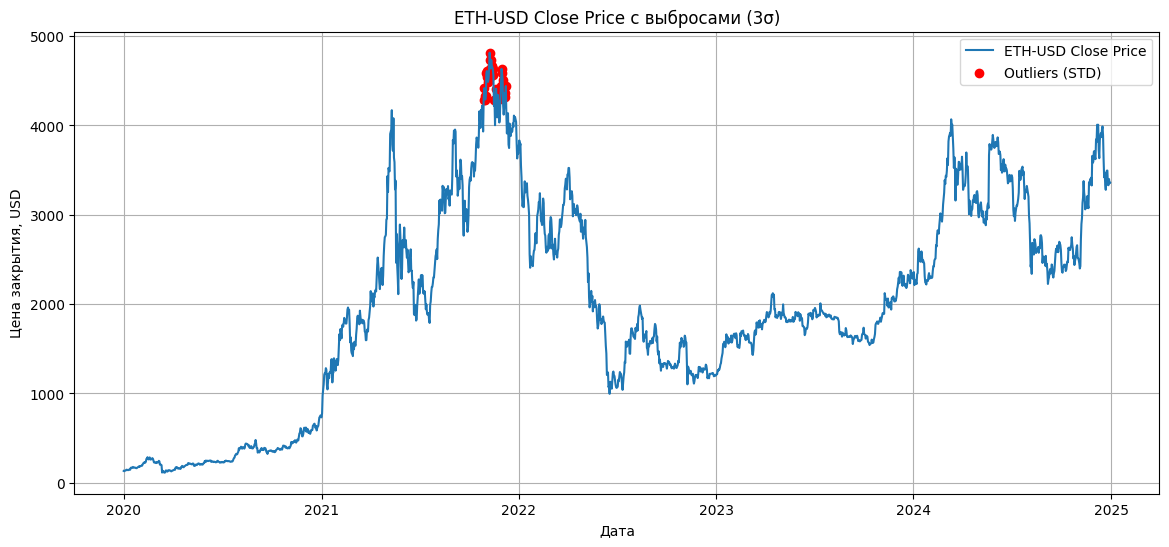

In [12]:
df = data['ETH-USD']

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='ETH-USD Close Price')
plt.scatter(df[df['Outlier_STD']]['Date'], df[df['Outlier_STD']]['Close'], color='red', label='Outliers (STD)', marker='o')
plt.title('ETH-USD Close Price с выбросами (3σ)')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия, USD')
plt.legend()
plt.grid(True)
plt.show()
